Fundamentos de machine learning
===

Preparación
----

Descripción del problema
---

La columna `'Author Keywords'` contiene las palabras claves de un conjunto de artículos extraído de Scopus. Estas palabras clave son consideradas descriptores del contenido del artículo, por lo que su análisis permite establecer el contenido conceptual de un cuerpo de literatura. De ahí que muchas técnicas de estadística y aprendizaje de máquinas sean empleadas para su análisis.

En este ejercicio, usted empleará los conocimientos adquiridos en el curso para construir un gráfico análitico comúnmente usado para el análisis comparativo de palabras que representan conceptos. Véase por ejemplo https://tlab.it/en/allegati/help_en_online/msvd.htm

1. Determine las 100 palabras clave más frecuentes. Utilice las funciones de Pandas para manipular el archivo, realizar el conteo a partir de los datos de la columna 'Author Keywords'. Como evidencia de este punto imprima las primeras y las últimas 5 palabras de este grupo de 100 palabras, y su frecuencia.

2. Construya la matriz documento-termino. Las filas son los documentos y las columnas son las 100 palabras clave más frecuentes. La matriz debería estar poblada de unos y ceros. Debe eliminar las filas que corresponden a los documentos que no usan ninguna de las 100 palabras clave más frecuentes. Como evidencia verifique que la suma de las columnas de la matriz documento-término es igual a la frecuencia computada para cada palabra en el punto anterior.

3. Construya la matriz de co-ocurrencias. En esta matriz, las filas y las columnas corresponden a las palabras claves. La diagonal es el total de veces que aparece la respectiva palabra. Los demas elementos de la matriz corresponden a las veces que aparece la palabra A con la palabra B en un mismo documento. esta matriz puede calcularse como transpuesta(A) * A, donde A es la matriz docuemnto-término. Como evidencia, grafique un mapa de calor, como por ejemplo, los obtenidos al usar seaborn. 

4. Para visualizar las relaciones de las palabras clave (cercanía), se puede reducir la dimensionalidad de la matriz de co-occurrencias a dos componentes usando SVD (o MSD), y graficar las palabras clave a partir de las coordenadas obtenidas. Un ejemplo se presenta a continuación (extraido del manual de usuario de T-LAB). El tamaño del texto es proporcional a la frecuencia de las palabras clave. Construya un gráfico similar a partir de la matriz de co-occurrencias que fue obtenida en el punto anterior.

![tlab](https://tlab.it/en/allegati/help_en_online/tlab_image/svd05.gif)

In [1]:
import pandas as pd

scopus = pd.read_csv("https://raw.githubusercontent.com/jdvelasq/datalabs/master/datasets/scopus-papers.csv")

#Almacenar columna 'Author Keywords en una lista y elimino los registros nulos
keywords = list(scopus['Author Keywords'].dropna())

#Ver los 12 primeros registros del dataset
scopus.head(12)

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,Link,Affiliations,Authors with affiliations,Author Keywords,Index Keywords,Document Type,Publication Stage,Access Type,Source,EID
0,"Roy K.C., Cebrian M., Hasan S.",57208923159;8724466500;55166094600;,Quantifying human mobility resilience to extre...,2019,EPJ Data Science,8.0,1,18,NaN,NaN,...,https://www.scopus.com/inward/record.uri?eid=2...,"Department of Civil, Environmental, and Constr...","Roy, K.C., Department of Civil, Environmental,...",Geo-location data; Human mobility; Resilience;...,Disasters; Economics; Social networking (onlin...,Article,Final,Open Access,Scopus,2-s2.0-85066153901
1,"Alizadeh M., Weber I., Cioffi-Revilla C., Fort...",56400437200;8943847500;6603233416;7005680829;5...,Psychology and morality of political extremist...,2019,EPJ Data Science,8.0,1,17,NaN,NaN,...,https://www.scopus.com/inward/record.uri?eid=2...,"Empirical Studies of Conflict Project, Woodrow...","Alizadeh, M., Empirical Studies of Conflict Pr...",Language analysis; LIWC; Moral foundations the...,Social networking (online); Language analysis;...,Article,Final,Open Access,Scopus,2-s2.0-85065925699
2,"Elejalde E., Ferres L., Schifanella R.",56244803400;14055701500;13605616200;,Understanding news outlets’ audience-targeting...,2019,EPJ Data Science,8.0,1,16,NaN,NaN,...,https://www.scopus.com/inward/record.uri?eid=2...,"L3S Research Center, Leibniz-University, Hanno...","Elejalde, E., L3S Research Center, Leibniz-Uni...",Gravity model; Media ecosystem; News spreading...,Ecosystems; Regression analysis; Gravity model...,Article,Final,Open Access,Scopus,2-s2.0-85065919884
3,"Ghalmane Z., El Hassouni M., Cherifi C., Cheri...",57205197386;55943083400;36476047200;55999019900;,Centrality in modular networks,2019,EPJ Data Science,8.0,1,15,NaN,NaN,...,https://www.scopus.com/inward/record.uri?eid=2...,"LRIT URAC No 29, Faculty of Science, Rabat IT ...","Ghalmane, Z., LRIT URAC No 29, Faculty of Scie...",Centrality measures; Community Structure; Infl...,Eigenvalues and eigenfunctions; Viruses; Centr...,Article,Final,Open Access,Scopus,2-s2.0-85065637466
4,"Aiello L.M., Schifanella R., Quercia D., Del P...",25630530900;13605616200;14038000600;57208565917;,Large-scale and high-resolution analysis of fo...,2019,EPJ Data Science,8.0,1,14,NaN,NaN,...,https://www.scopus.com/inward/record.uri?eid=2...,"Nokia Bell Labs, Cambridge, United Kingdom; Un...","Aiello, L.M., Nokia Bell Labs, Cambridge, Unit...",Cholesterol; Diabetes; Digital purchase record...,Cholesterol; Food supply; Insurance; Medical p...,Article,Final,Open Access,Scopus,2-s2.0-85065148735
5,"Calanca F., Sayfullina L., Minkus L., Wagner C...",56888673400;56951062700;57202005720;5558840240...,Responsible team players wanted: an analysis o...,2019,EPJ Data Science,8.0,1,13,NaN,NaN,...,https://www.scopus.com/inward/record.uri?eid=2...,"Sapienza University of Rome, Rome, Italy; Aalt...","Calanca, F., Sapienza University of Rome, Rome...",Computational social science; Crowdsourcing; G...,Commerce; Crowdsourcing; Data mining; Wages; C...,Article,Final,Open Access,Scopus,2-s2.0-85065017590
6,"Su X., Hu H.",57208262675;55740754600;,Gender-specific preference in online dating,2019,EPJ Data Science,8.0,1,12,NaN,NaN,...,https://www.scopus.com/inward/record.uri?eid=2...,East China University of Science and Technolog...,"Su, X., East China University of Science and T...",Mate choice; Online dating; Preference; Social...,Behavioral research; Economics; Game theory; C...,Article,Final,Open Access,Scopus,2-s2.0-85064260228
7,"Koh V., Li W., Livan G., Capra L.",57208059048;56920868100;35366644500;7003753918;,Offline biases in online platforms: a study of...,2019,EPJ Data Science,8.0,1,11,NaN,NaN,...,https://www.scopus.com/inward/record.uri?eid=2...,"Department of Computer Science, University Col...","Koh, V., Department of Computer Science, Unive...",Homophily; Online User Behavior; Sharing Econo...,Behavioral research; S

## 1° Punto

1. Determine las 100 palabras clave más frecuentes. Utilice las funciones de Pandas para manipular el archivo, realizar el conteo a partir de los datos de la columna 'Author Keywords'. Como evidencia de este punto imprima las primeras y las últimas 5 palabras de este grupo de 100 palabras, y su frecuencia.

In [2]:
import operator

keywords_lower = []
keywords_splited = []
lst_hundred_keywords = []
dict_keywords = {}

#Pasar a minuscula las palabras almacenadas en la lista
for k in keywords:
    k = str(k)
    keywords_lower.append(k.lower())

#Dividir cada elemento de la lista por "; " 
for k in range(len(keywords_lower)):
    keywords_lower[k] = str(keywords_lower[k])
    keywords_splited.append(keywords_lower[k].split("; "))

#Almacenar el número de ocurrencias de cada palabra
for k in range(len(keywords_splited)):
    for a in keywords_splited[k]:
        if a != "nan":
            if a in dict_keywords:
                dict_keywords[a] = int(dict_keywords[a]) + 1
            else:
                dict_keywords[a] = 1

#Ordenar el diccionario por los valores de mayor a menor
lst_hundred_keywords = sorted(dict_keywords.items(), key=operator.itemgetter(1), reverse=True)

#Extraer los 100 elementos con los valores más altos
lst_hundred_keywords = lst_hundred_keywords[:100]


#Almacenar las claves y los valores del diccionario en un dataset
df = pd.DataFrame()

keys = []
values = []

df['keys'] = None
df['values'] = None

for k in lst_hundred_keywords:
    keys.append(k[0])
    values.append(k[1])

df['keys'] = keys
df['values'] = values

df

,keys,values
0,big data,167
1,data mining,133
2,machine learning,57
3,clustering,41
4,big data analytics,37
...,...,...
95,optimization,6
96,marketing,6
97,recommender systems,6
98,forecasting,6


#### First Five Words

In [3]:
#Imprimir las primeras 5 palabras con valor de ocurrencias más alto
df.head(5)

,keys,values
0,big data,167
1,data mining,133
2,machine learning,57
3,clustering,41
4,big data analytics,37


#### Last Five Words

In [4]:
#Imprimir las últimas 5 palabras con valor de ocurrencias más bajo
df.tail(5)

,keys,values
95,optimization,6
96,marketing,6
97,recommender systems,6
98,forecasting,6
99,network analysis,6


## 2° Punto: Matriz Documento Término

2. Construya la matriz documento-termino. Las filas son los documentos y las columnas son las 100 palabras clave más frecuentes. La matriz debería estar poblada de unos y ceros. Debe eliminar las filas que corresponden a los documentos que no usan ninguna de las 100 palabras clave más frecuentes. Como evidencia verifique que la suma de las columnas de la matriz documento-término es igual a la frecuencia computada para cada palabra en el punto anterior.

In [5]:
import numpy as np

#llenar el dataframe con valores de 0
isEmpty = np.full((len(keywords_lower), len(keys)), 0)

#crear el dataframe con los valores de 0 en las filas y los nombres de las 100 palabras extraidas en las columnas
df_mdt = pd.DataFrame(isEmpty, columns=keys)

#generar la matriz de 1 y 0 a los documentos que tienen las 100 palabras evaluadas
for k in range(len(keywords_lower)):
    text = str(keywords_lower[k])
    text = text.split("; ")
    for t in range(len(text)):
        keyword = str(text[t]).lower()
        for col in df_mdt.columns:
            if col == keyword:
                df_mdt[col][k] = 1

df_mdt = df_mdt.reset_index(drop = True)
df_mdt = df_mdt.loc[~(df_mdt == 0).all(axis = 1)]
df_mdt.sum()

big data               167
data mining            133
machine learning        57
clustering              41
big data analytics      37
                      ... 
optimization             6
marketing                6
recommender systems      6
forecasting              6
network analysis         6
Length: 100, dtype: int64

## 3° Punto: Matriz de Coocurrencias

3. Construya la matriz de co-ocurrencias. En esta matriz, las filas y las columnas corresponden a las palabras claves. La diagonal es el total de veces que aparece la respectiva palabra. Los demas elementos de la matriz corresponden a las veces que aparece la palabra A con la palabra B en un mismo documento. esta matriz puede calcularse como transpuesta(A) * A, donde A es la matriz docuemnto-término. Como evidencia, grafique un mapa de calor, como por ejemplo, los obtenidos al usar seaborn. 

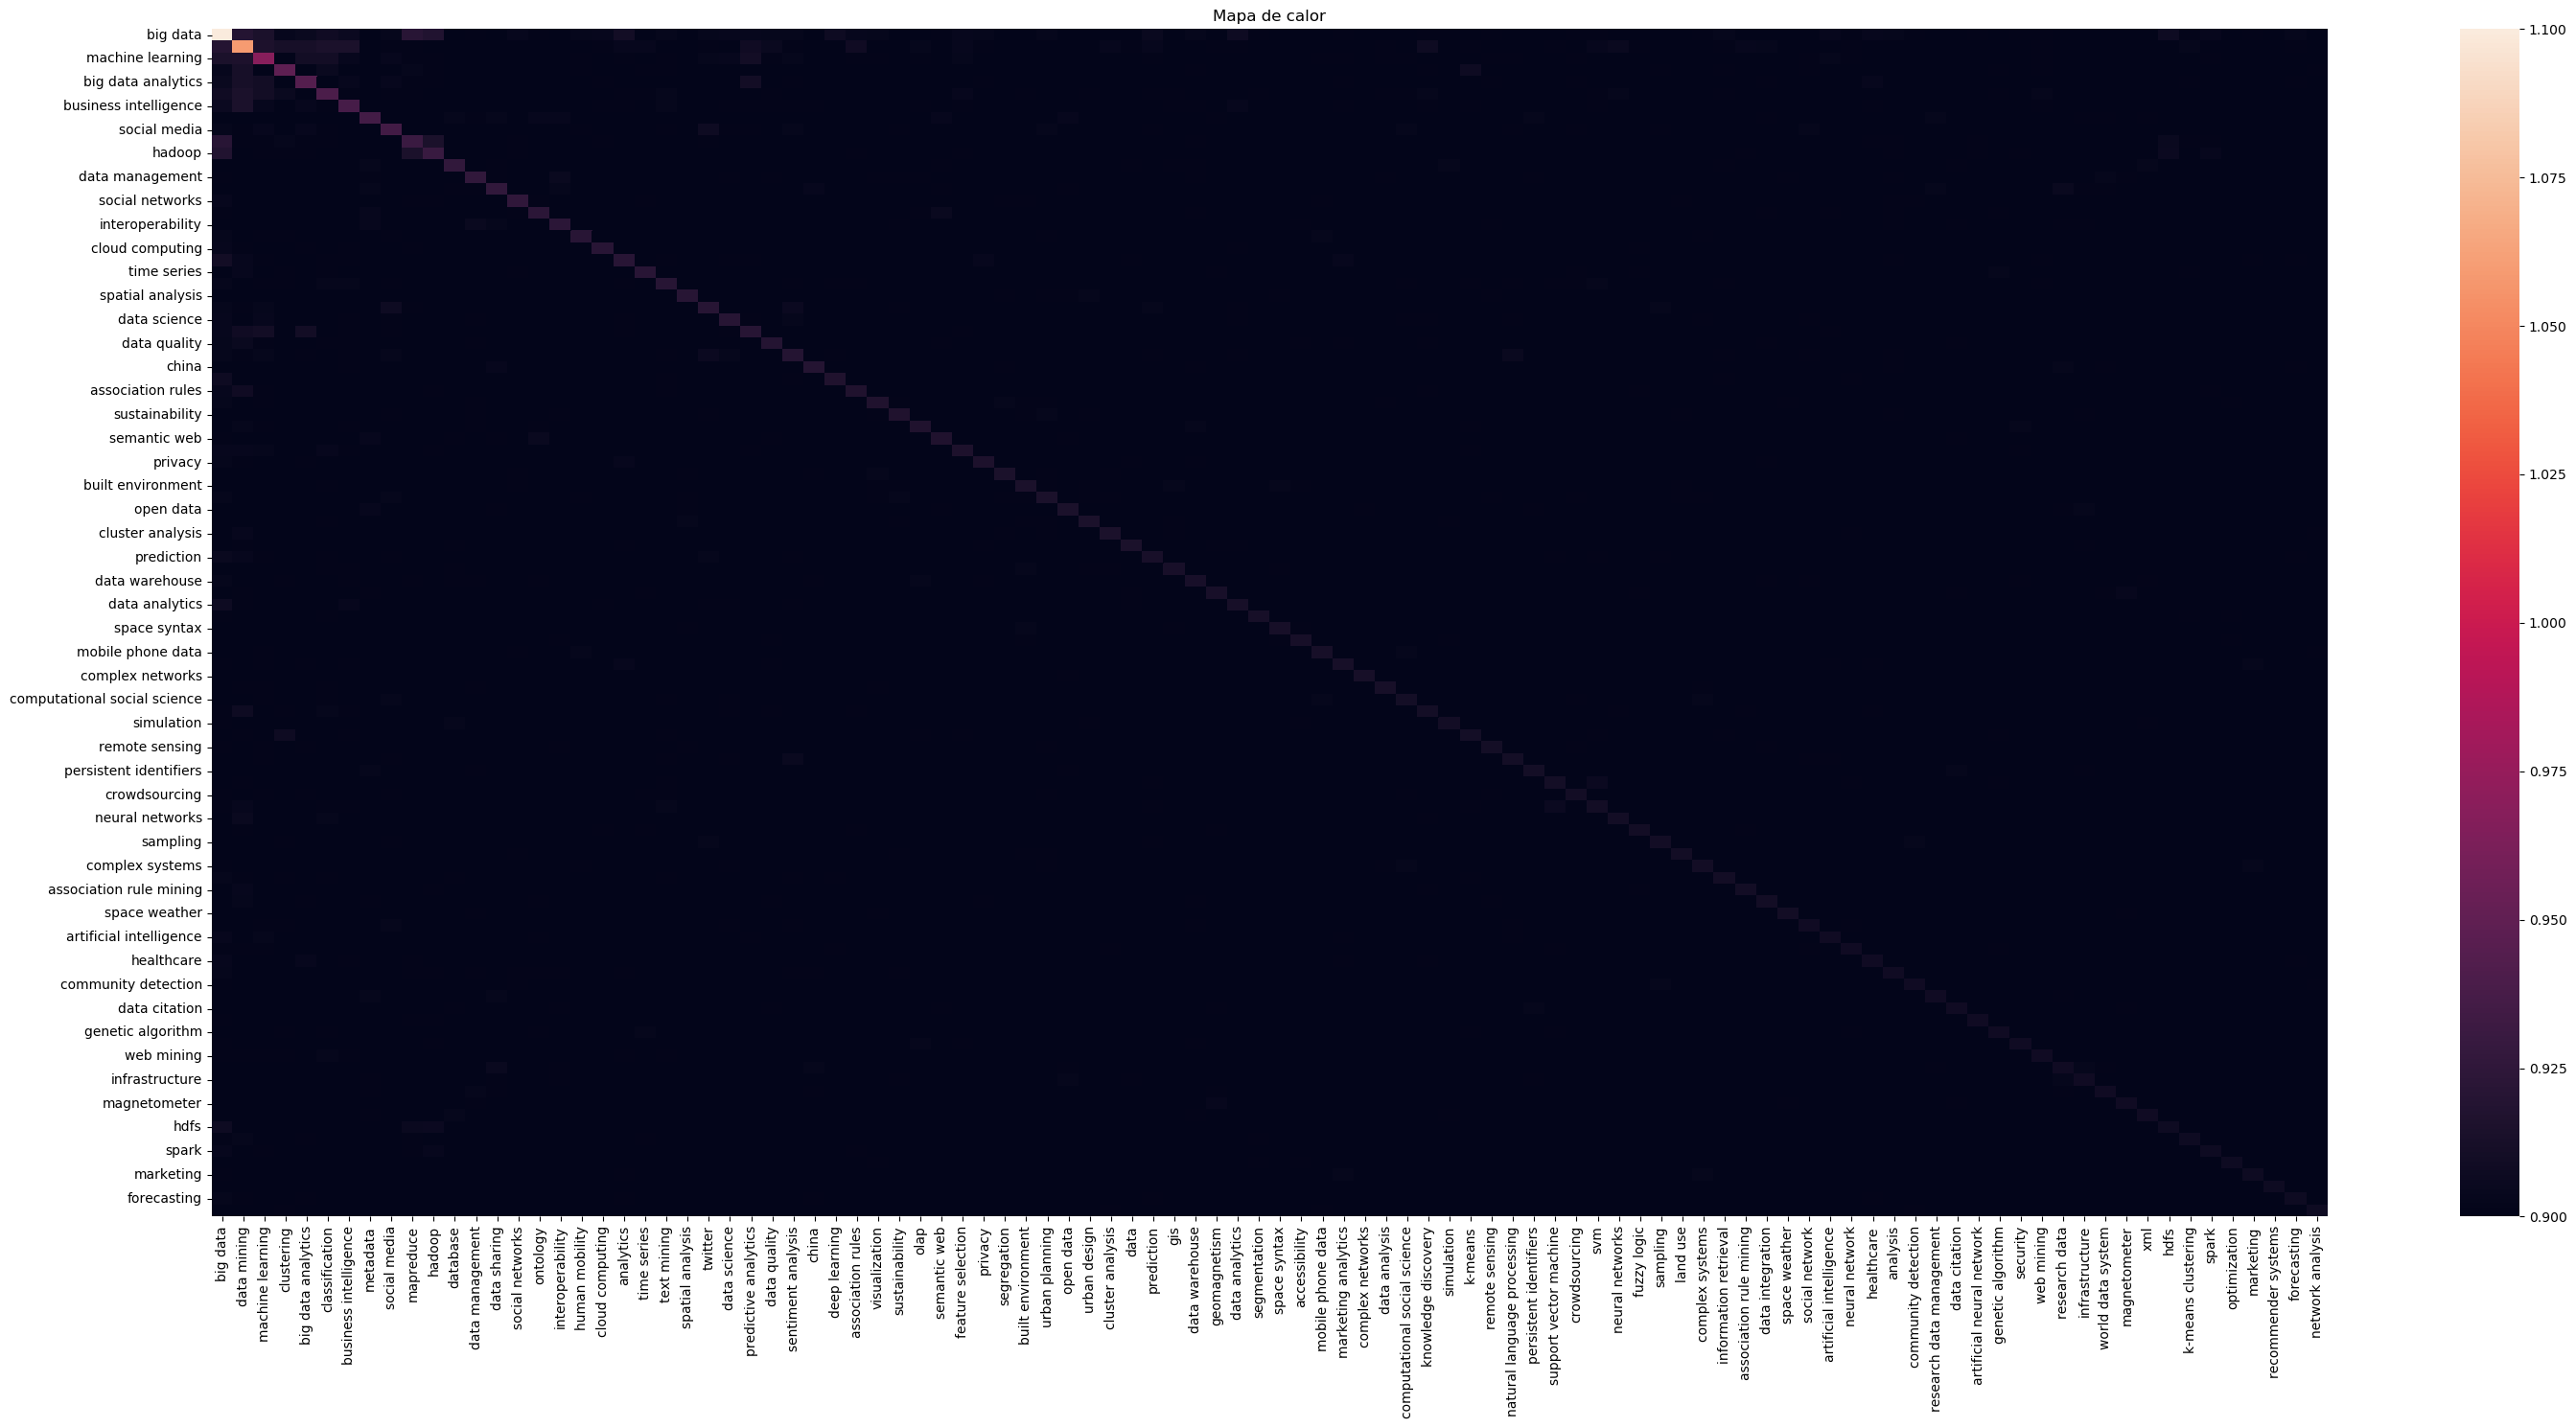

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

#Se calcula la transpuesta de la matriz anterior
mdt_transpose = np.transpose(df_mdt)

#Se multiplica la matriz anterior por su transpuesta para encontrar las coocurrencias
co_ocurrencias = np.dot(mdt_transpose, df_mdt)

#Se genera un dataframe con las coocurrencias encontradas
df_co_ocurrencias = pd.DataFrame(co_ocurrencias, columns= keys, index= keys)

#Se genera el mapa de calor con las coocurrencias encontradas
c = df.corr()
plt.figure(figsize=(30,15))
sns.heatmap(c)
sns.heatmap(df_co_ocurrencias, cbar=None)
plt.title("Mapa de calor"), plt.tight_layout()
plt.show()

## 4° Punto: Reducción de dimensionalidad y visualización de palabras

4. Para visualizar las relaciones de las palabras clave (cercanía), se puede reducir la dimensionalidad de la matriz de co-occurrencias a dos componentes usando SVD (o MSD), y graficar las palabras clave a partir de las coordenadas obtenidas. Un ejemplo se presenta a continuación (extraido del manual de usuario de T-LAB). El tamaño del texto es proporcional a la frecuencia de las palabras clave. Construya un gráfico similar a partir de la matriz de co-occurrencias que fue obtenida en el punto anterior.

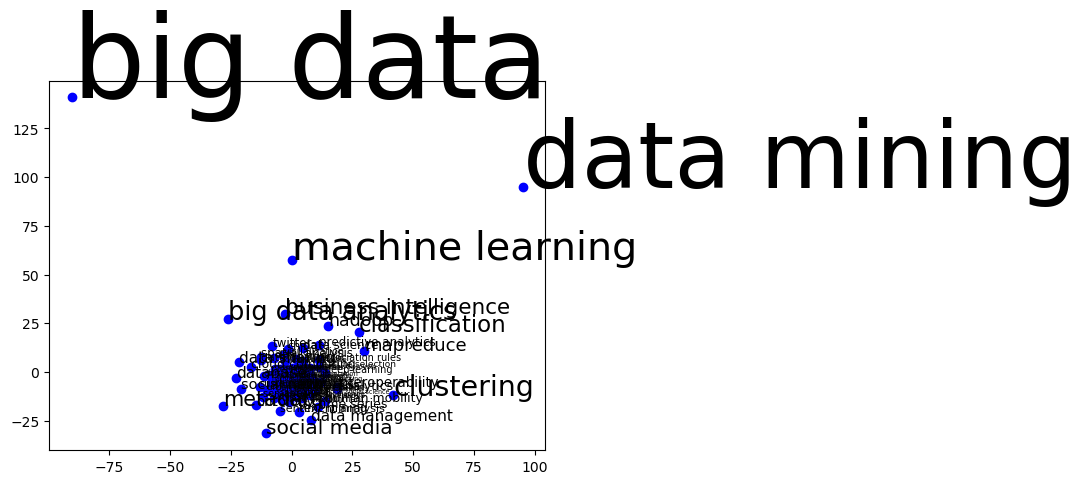

<Figure size 3000x2000 with 0 Axes>

In [12]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.manifold import MDS

#Se extrae el número de repeticiones de cada palabra
repetitions_ = np.diag(df_co_ocurrencias)

#Se reduce la dimensionalidad del dataset a 2 dimensiones
repetitions_reduced = MDS().fit_transform(df_co_ocurrencias)

#Se realiza el gráfico de los puntos azules
plt.scatter(
  repetitions_reduced[:, 0],
  repetitions_reduced[:, 1],
  c='blue',
  cmap='plasma'
)
#Se realiza la graficación de las palabras sobre cada punto azul visualizado en el plano
for fila in range(repetitions_reduced.shape[0]):
    x = repetitions_reduced[fila, 0]
    y = repetitions_reduced[fila, 1]
    plt.text(
        x, 
        y,
        df_co_ocurrencias.index[fila],
        fontsize = repetitions_[fila]/2
    )

plt.figure(figsize=(30,20))

plt.show()